In [1]:
!pip install seaborn
!pip install matplotlib

In [38]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math
#plt.style.use('seaborn-whitegrid')

# Alcohol affect on Students

In [3]:
m=pd.read_csv("Maths.csv")

In [6]:
m.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# 'm' dataframe is about the students who are studying maths subject

In [8]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Total number of females students studying

In [35]:
m[m["sex"]=="F"]["sex"].count()

208

# Total number of males students studying

In [31]:
m[m["sex"]=="M"]["sex"].count()

187

# Parents working, of the students studying

# Mothers working

In [32]:
m[m["Mjob"]!="at_home"]["Mjob"].count()

336

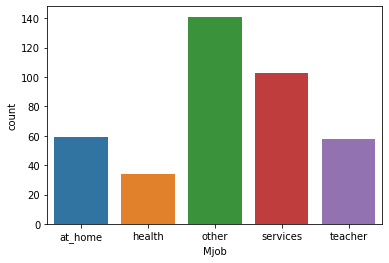

In [12]:
sns.countplot(data=m,x='Mjob');

# Fathers working

In [13]:
m[m["Fjob"]!="at_home"]["Fjob"].count()

375

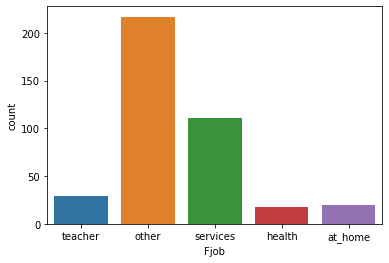

In [14]:
sns.countplot(data=m,x='Fjob')
plt.show()

# Average of Students Grades from I , II & III year from both Schools

In [40]:
gp_1 = round(m[m.school == 'GP']['G1'].mean(), 2)
gp_2 = round(m[m.school == 'GP']['G2'].mean(), 2)
gp_3 = round(m[m.school == 'GP']['G3'].mean(), 2)

ms_1 = round(m[m.school == 'MS']['G1'].mean(), 2)
ms_2 = round(m[m.school == 'MS']['G2'].mean(), 2)
ms_3 = round(m[m.school == 'MS']['G3'].mean(), 2)

print(f'the mean of GP students are: {gp_1}, {gp_2}, and {gp_3}')
print(f'the mean of MS students are: {ms_1}, {ms_2}, and {ms_3}')

the mean of GP students are: 10.94, 10.78, and 10.49
the mean of MS students are: 10.67, 10.2, and 9.85


# Bar Graph denoting the Average Grades of III , II & I year - GP School

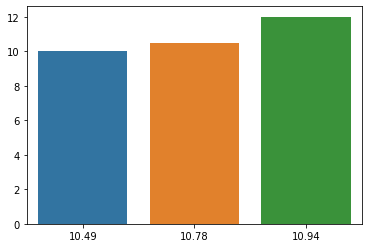

In [50]:
sns.barplot(x=[gp_3,gp_2,gp_1],y=[10,10.5,12]);

# Bar Graph denoting the Average Grades of III, II & I year - MS School

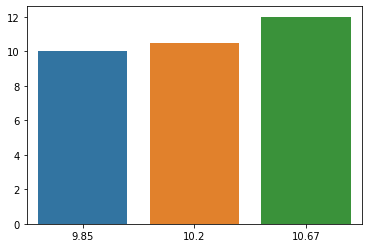

In [54]:
sns.barplot(x=[ms_3,ms_2,ms_1],y=[10,10.5,12]);

The grades are distributed uniformly in GP school, when compared to the MS school.

The average of the grades drop till 9, in the MS School.

Despite of the Schools compared, the insight that we get is that the grades have dropped in the III year when compared to the I year.

Grade change over time (G3 - G1)

We are taking the difference of the Grades, i.e III year Grade - I year Grade

If the value is positive, it means that the Grade has improved from what it was in the I year

If the value is negative, it means that the Grade has gone down from what it was in the I year

In [55]:
m['change'] = m['G3'] - m['G1']

As it is shown in the above graphs, the Grades of students from both Schools - GP & MS have gone down as the students progress from I year to III year.

Let us find the factors that influence on the Grades.

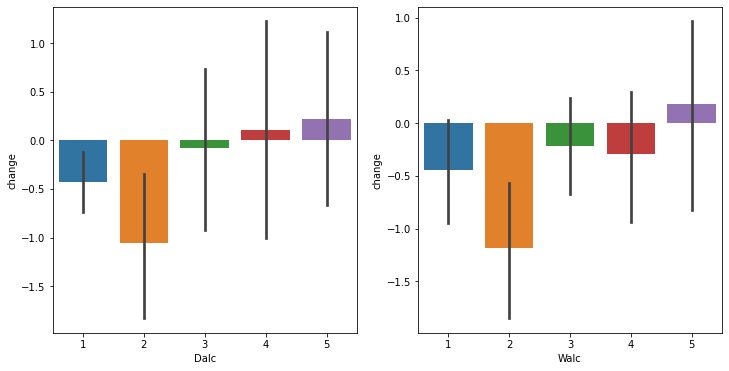

In [59]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.barplot(ax=ax[0], data=m, x='Dalc', y='change')
sns.barplot(ax=ax[1], data=m, x='Walc', y='change');

# The Students with lowest alcohol consumption see the biggest drop in their grades

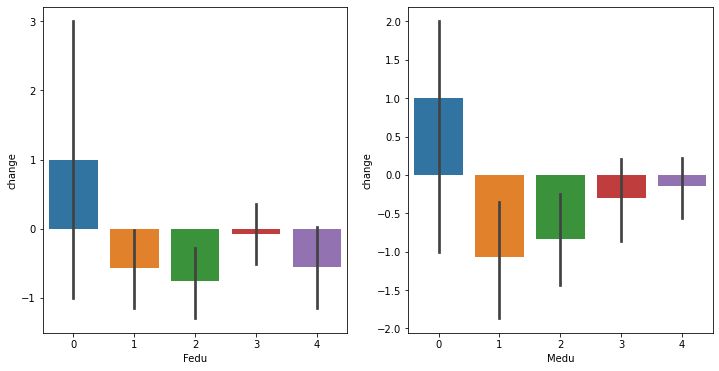

In [60]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.barplot(ax=ax[0], data=m, x='Fedu', y='change')
sns.barplot(ax=ax[1], data=m, x='Medu', y='change')

plt.show()

# This Graph shows Parents with no Education, those Students have better Grades

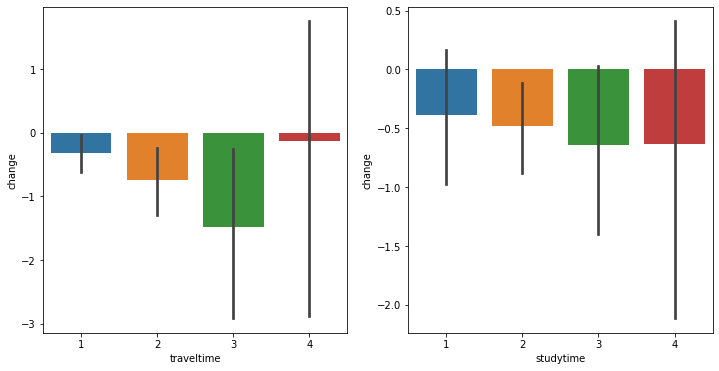

In [61]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.barplot(ax=ax[0], data=m, x='traveltime', y='change')
sns.barplot(ax=ax[1], data=m, x='studytime', y='change');


# Here in this case, the greater the study time has the greater affect on the Grades

# And, the travel time upto 3 (30 min travel) has affected the Grades, interestingly when the travel time reaches the highest 4 (1 hour travel) - this has helped with the Grades

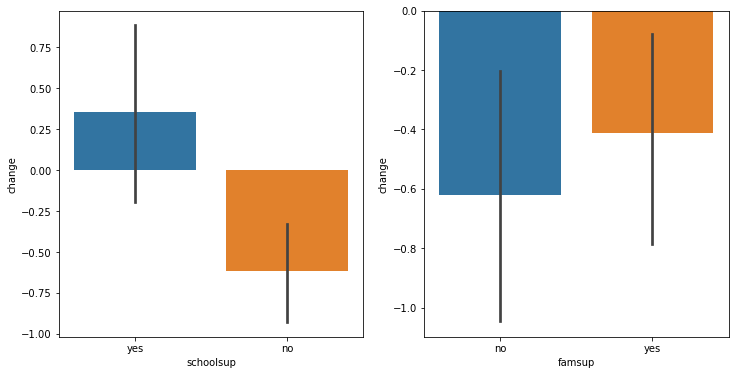

In [63]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.barplot(ax=ax[0], data=m, x='schoolsup', y='change')
sns.barplot(ax=ax[1], data=m, x='famsup', y='change');

# Above shows us that the Grades have gone up with School supporting the students in their academics

# But with the family support, the Grades are more worse when there is no support at all

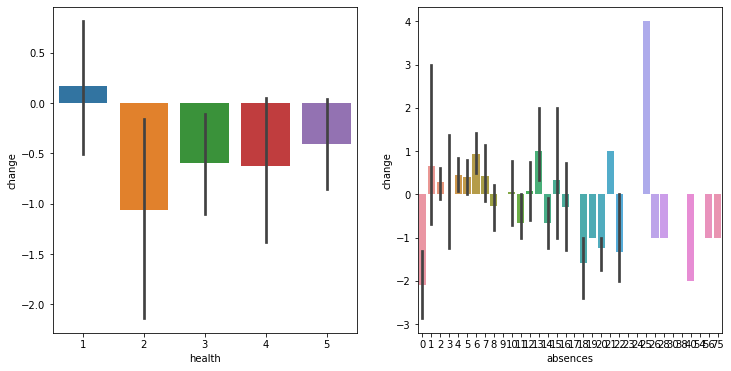

In [69]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.barplot(ax=ax[0], data=m, x='health', y='change')
sns.barplot(ax=ax[1], data=m, x='absences', y='change');

# Clearly healthier students have bad grades, and there is an exception - where students with very low health condition have got good grades compared to the healthiest

# Absent to School, doesn't have any affect with the Students Grades

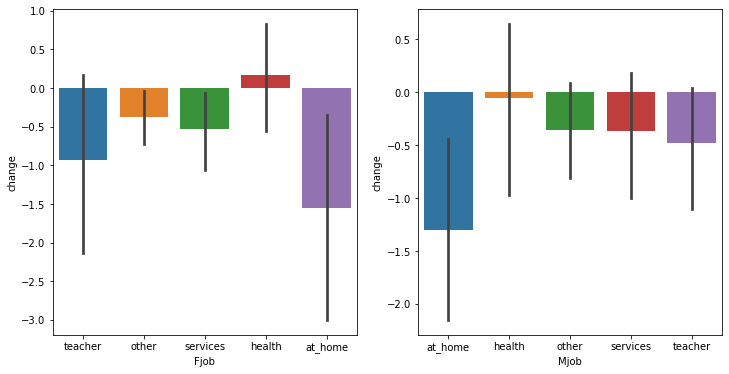

In [71]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.barplot(ax=ax[0], data=m, x='Fjob', y='change')
sns.barplot(ax=ax[1], data=m, x='Mjob', y='change');

# Grades of students whose parents aren't working have the Least Grades

# Another observation is that students have better Grades whose Parents are working in the health department

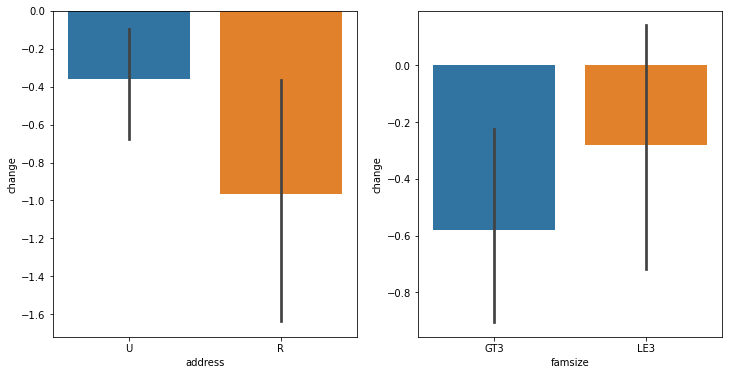

In [73]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.barplot(ax=ax[0], data=m, x='address', y='change')
sns.barplot(ax=ax[1], data=m, x='famsize', y='change');

# Grades are better if the students are from Urban Residential Living

# Grades are better if the students family is of size, not more than 3 members

# Summary

# Many factor influence the grades but alcohol does not seem to have the influence that the title suggest